In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing and then viewing data.

In [3]:
df = pd.read_excel('/Users/jtgood/Library/Containers/com.microsoft.Excel/Data/Desktop/QB_Data_Drafted.xlsx')
df.head()

,Year,Round,Pick,Team,Player,Pos,Age,1st Team AP,Pro Bowl,Wins,...,C_TD,C_Int,C_Int %,CR_Att,CR_Yds,CR_TD,247_Stars,247_Composite,Class,247_Rank
0,2004,6,185.0,Philadelphia,Andy Hall,QB,23.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,1.0,Jacksonville,Trevor Lawrence,QB,21.0,0,0,1,...,90.0,17.0,0.014938,231.0,943.0,18.0,5.0,0.9999,2018.0,1.0
2,2019,1,6.0,New York Giants,Daniel Jones,QB,22.0,0,0,9,...,52.0,29.0,0.022745,406.0,1323.0,17.0,NaN,NaN,NaN,NaN
3,2019,4,104.0,Cincinnati,Ryan Finley,QB,24.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,8,300.0,New York Jets,John Wolford,QB,23.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering out data that's not needed.
I'm looking for players who have thrown at least 250 NCAA passes AND 250 NFL passes.

In [4]:
needed_data = df[['Att', 'C_Att', 'Comp_Per', 'C_Comp_Per']]
over_250 = needed_data[needed_data['Att']>250]
over_250_c = over_250[over_250['C_Att']>250]

Verfying that the shape is correct (the second number should be 4 for the number of columns).
The first number signifies how many observations I'll have.

In [5]:
over_250_c.shape

(141, 4)

Running a quck scatter plot to make sure my data can be plotted the way I envision.
X axis will show a players career college completion percentage.
Y axis will show a players career NFL completion percentage.

<AxesSubplot:xlabel='C_Comp_Per', ylabel='Comp_Per'>

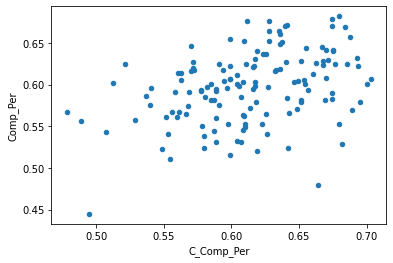

In [6]:
over_250_c.plot(kind='scatter', x='C_Comp_Per', y='Comp_Per')

Finding the mean for NFL completion percentage for quadrant analysis.

In [16]:
over_250_c["Comp_Per"].mean()

0.5969459954214097

Finding the mean for college completion percentage for quadrant analysis.

In [17]:
over_250_c["C_Comp_Per"].mean()

0.613793361052387

Plotting findings for quadrant analysis.

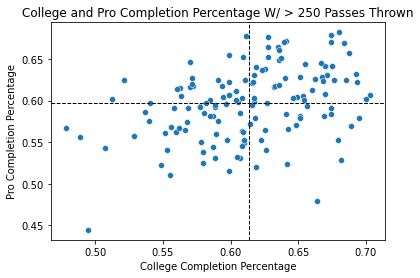

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=over_250_c, x='C_Comp_Per', y='Comp_Per')
plt.title(f"College and Pro Completion Percentage W/ > 250 Passes Thrown")
plt.xlabel('College Completion Percentage')
plt.ylabel('Pro Completion Percentage')
plt.axhline(y=over_250_c.Comp_Per.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=over_250_c.C_Comp_Per.mean(), color='k',linestyle='--', linewidth=1) 

plt.show()

Observing r squared.
Ideally, hoping for a reading of 0.9 or higher.
A reading of 0.7 could be considered meaningful.

In [8]:
x = over_250_c.C_Comp_Per
y = over_250_c.Comp_Per
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.14441832587945116


After receiving a value of 0.14, there is little correlation between a players college completion percentage and their NFL completion percentage.

Finding out how many players have an above average NFL AND college completion percentage.

In [21]:
over_250_c[(over_250_c.Comp_Per >= 0.5969459954214097) & (over_250_c.C_Comp_Per >=0.6135248499937287)].count() 

Att           48
C_Att         48
Comp_Per      48
C_Comp_Per    48
dtype: int64

Finding out how many players have an above average NFL and a below average college completion percentage.

In [22]:
over_250_c[(over_250_c.Comp_Per >= 0.5969459954214097) & (over_250_c.C_Comp_Per <0.6135248499937287)].count() 

Att           26
C_Att         26
Comp_Per      26
C_Comp_Per    26
dtype: int64

Finding out how many players have a below average NFL and an above average college completion percentage.

In [23]:
over_250_c[(over_250_c.Comp_Per < 0.5969459954214097) & (over_250_c.C_Comp_Per >=0.6135248499937287)].count() 

Att           23
C_Att         23
Comp_Per      23
C_Comp_Per    23
dtype: int64

Finding out how many players have a below average NFL AND college completion percentage.

In [24]:
over_250_c[(over_250_c.Comp_Per < 0.5969459954214097) & (over_250_c.C_Comp_Per < 0.6135248499937287)].count() 

Att           44
C_Att         44
Comp_Per      44
C_Comp_Per    44
dtype: int64